Text(0, 0.5, 'State')

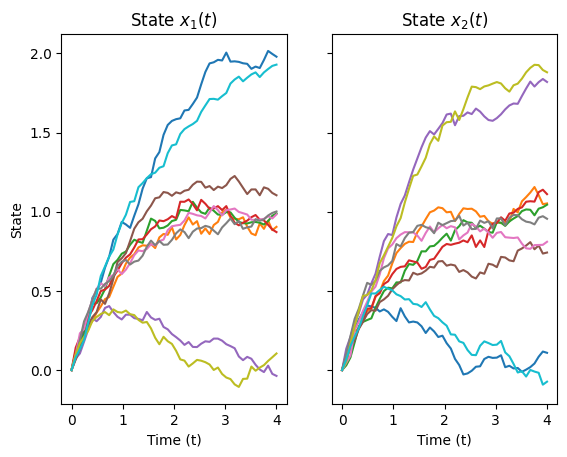

In [12]:
from src.data_generate_sde import sde_cell_model, time
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

from src.data_generate_sde import sde_ornstein_uhlenbeck
from tueplots import bundles, axes, cycler, figsizes
from tueplots.constants.color import palettes
import matplotlib.pyplot as plt

# bundle = bundles.neurips2023()
# plt.rcParams.update(bundle)
# axes.lines()
# plt.rcParams.update(cycler.cycler(color=palettes.paultol_muted))


x0 = [0., 0.]
y= [1.4, 0.2]
T = 4.
N = 50
ts = time.grid(0, T, N)


keys = jax.random.split(jax.random.PRNGKey(0), 10)
data_fn = sde_cell_model.data_forward(x0, T, N)
_, forward_trajs, correction = data_fn(keys)

# plt.rcParams.update(figsizes.neurips2023(nrows=1, ncols=2))
fig, axes = plt.subplots(1, 2, sharey=True)

for traj in forward_trajs:
    axes[0].plot(ts, traj[..., 0])
    axes[1].plot(ts, traj[..., 1])
axes[0].set_title(r'State $x_1(t)$')
axes[1].set_title(r'State $x_2(t)$')
axes[0].set_xlabel('Time (t)')
axes[1].set_xlabel('Time (t)')
axes[0].set_ylabel(r'State')
# axes[1].set_ylabel(r'State ($x_2(t)$)')

# plt.savefig('cell_model_forward_trajs.pdf')



404


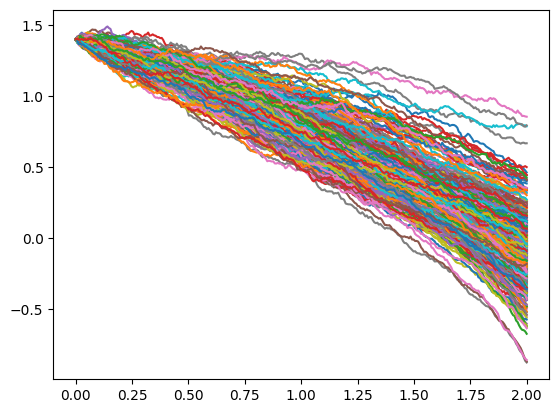

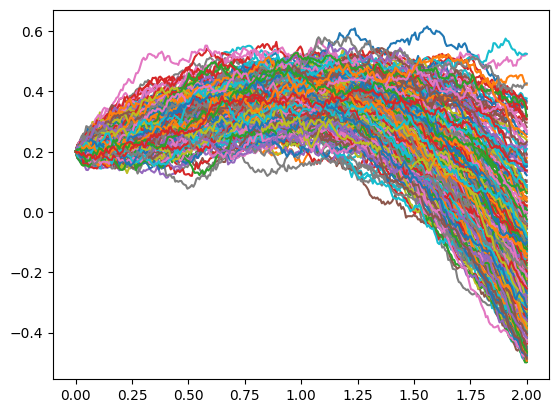

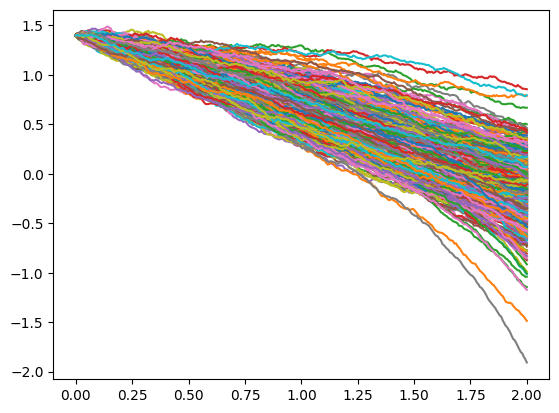

<function matplotlib.pyplot.show(close=None, block=None)>

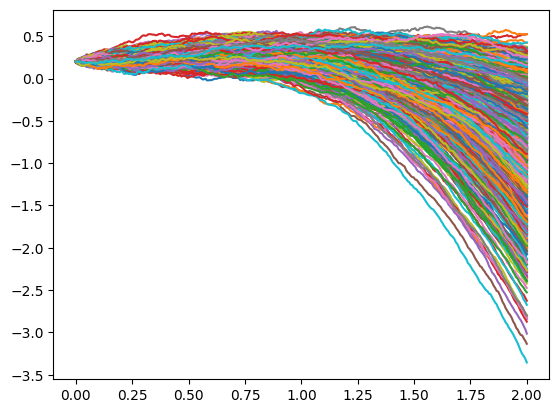

In [10]:
from src.data_generate_sde import sde_cell_model, time
import matplotlib.pyplot as plt
import jax

# y = [1., 1.]
# T = 2.
# N = 100
# ts = time.grid(0, T, N)


keys = jax.random.split(jax.random.PRNGKey(0), 1000)

inverse_covariance = jnp.asarray([[1e-2, 0.], [0., 1e-2]])
weight_fn = sde_cell_model.weight_function_gaussian(x0, inverse_covariance)
data_fn = sde_cell_model.data_reverse(y, T, N, weight_fn)
_, rev_trajs, correction = data_fn(keys)

def good_condition(traj):
    return abs(traj[-1, 0] - 0.1)<1 and abs(traj[-1, 1] - 0.5)<1

good_trajectories = [traj for traj in rev_trajs if good_condition(traj)]
print(len(good_trajectories))

for traj in good_trajectories:
        plt.plot(ts, traj[..., 0])
plt.show()
    
for traj in good_trajectories:
    plt.plot(ts, traj[..., 1])
plt.show()

for traj in rev_trajs:
        plt.plot(ts, traj[..., 0])
plt.show()
    
for traj in rev_trajs:
    plt.plot(ts, traj[..., 1])
plt.show

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


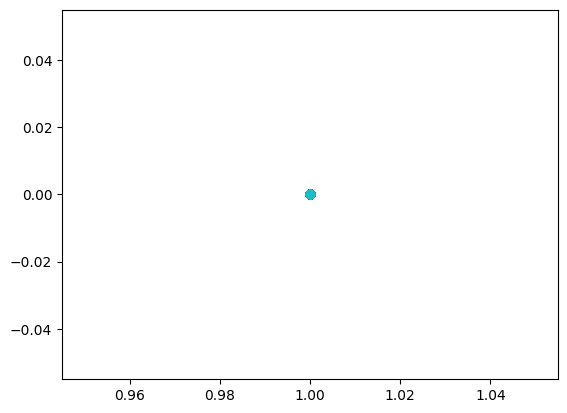

In [3]:
for c in correction:
    if c > 0.5:
        plt.scatter(ts[-1], c)
        print(c)
plt.show()

for c in correction:
    if c < 0.5:
        print(c)
        plt.scatter(ts[-1], c)
plt.show()

In [4]:
weight_fn = sde_cell_model.weight_function_gaussian(x0, 1.)
data_fn = sde_cell_model.data_reverse_guided(x0, y, T, N, weight_fn)
_, rev_trajs, correction = data_fn(keys)

for traj in rev_trajs:
    plt.plot(ts, traj[..., 0])
plt.show()

for traj in rev_trajs:
    plt.plot(ts, traj[..., 1])
plt.show()


ValueError: input with shape () does not have enough dimensions for all core dimensions ('m', 'm') on vectorized function with excluded=frozenset() and signature='(m,m),(m)->(m)'